In [274]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 


In [319]:
data=pd.read_csv('survey lung cancer (2).csv')

In [320]:
df = pd.DataFrame(data)

In [321]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [322]:
df.shape

(309, 16)

In [323]:
print(df.isnull().sum())


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [324]:
from sklearn.preprocessing import LabelEncoder



# Initialize label encoder
le = LabelEncoder()


# Apply label encoding
df['GENDER_encoded'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])


print(df)


    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [325]:
X = df.drop(columns=['GENDER','LUNG_CANCER']) 
y = df['GENDER']
y=df['LUNG_CANCER']
df.dropna()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_encoded
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,0
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,1
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,1
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,1


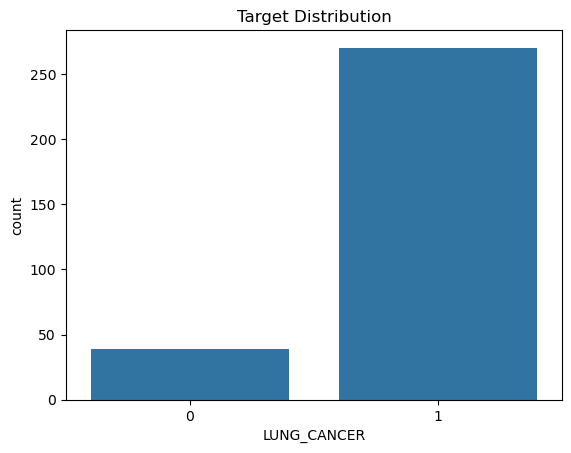

In [326]:
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');


<Axes: ylabel='AGE'>

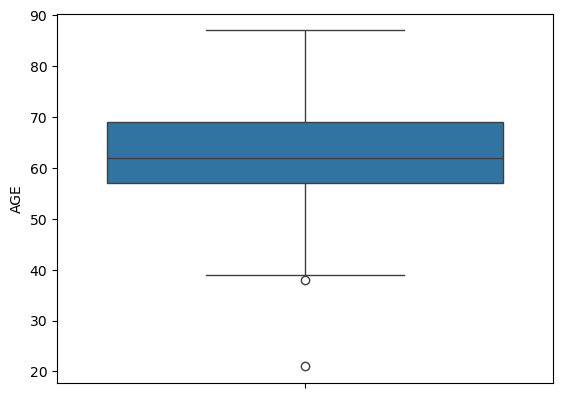

In [355]:
sns.boxplot(y='AGE',data=df)

In [358]:
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

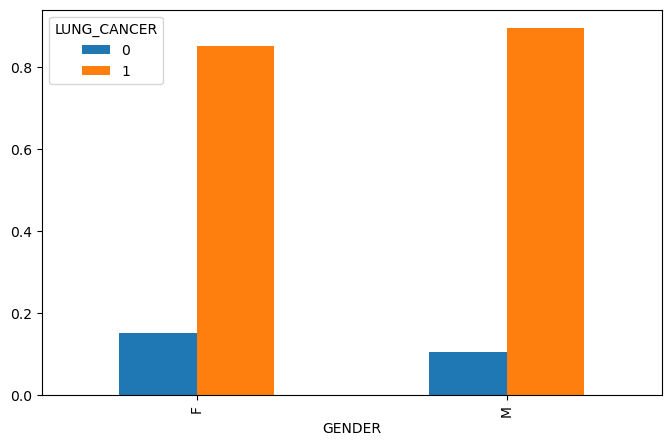

In [360]:
plot('GENDER')

<Axes: xlabel='AGE'>

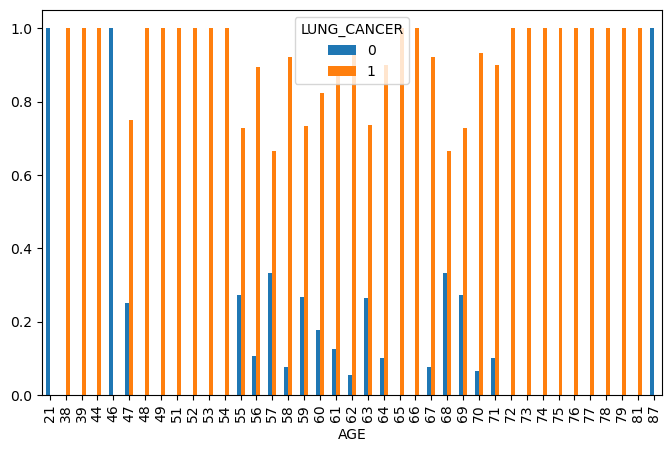

In [361]:
plot('AGE')

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

In [342]:
X_train

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_encoded
126,51,2,1,1,1,1,2,1,2,2,2,2,1,2,1
13,58,2,1,1,1,1,2,2,2,2,2,2,1,2,1
148,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
111,61,2,2,2,1,1,2,2,1,2,1,2,2,2,1
85,60,1,2,2,1,1,1,1,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,65,2,2,2,2,1,2,1,2,1,2,2,2,1,0
251,64,2,2,2,2,2,2,2,2,1,2,2,2,2,0
140,47,2,2,1,2,2,2,2,2,1,2,2,1,1,0
301,64,1,2,2,2,1,1,2,1,2,1,1,2,2,1


In [343]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [344]:
X_test

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_encoded
245,59,1,1,1,2,1,2,1,2,1,1,2,1,2,1
215,62,1,1,1,1,2,2,1,1,1,1,2,1,1,0
232,62,1,2,1,2,2,2,2,2,2,2,1,2,2,1
190,69,1,1,1,1,2,2,1,1,1,1,1,1,1,0
130,51,2,2,2,2,1,2,1,1,1,1,2,2,1,0
198,73,2,2,2,1,2,1,2,1,2,1,1,1,1,0
297,47,2,2,1,2,2,2,2,2,1,2,2,1,1,0
78,67,2,2,2,2,2,1,1,1,2,1,1,2,2,1
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
222,77,1,1,1,2,2,2,2,2,2,1,1,1,2,0


In [345]:
y_test

245    0
215    0
232    1
190    1
130    1
198    1
297    1
78     1
3      0
222    1
101    1
187    1
57     1
197    1
67     1
92     1
61     0
96     1
122    1
118    1
35     1
149    1
53     1
205    1
84     1
129    0
146    1
64     1
216    1
256    1
273    1
Name: LUNG_CANCER, dtype: int32

In [346]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [347]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.10%


In [348]:
print(confusion_matrix(y_test, y_pred))

[[ 4  1]
 [ 3 23]]


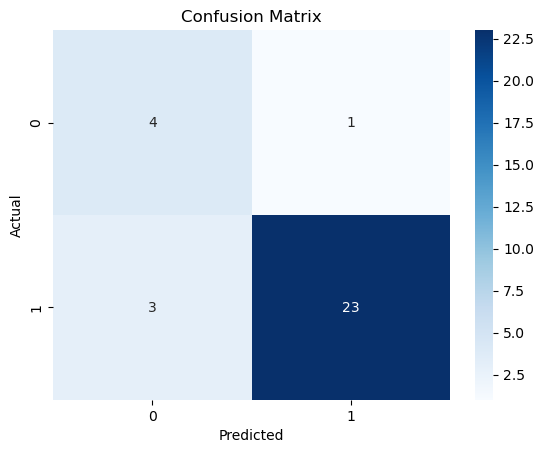

In [349]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [350]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.96      0.88      0.92        26

    accuracy                           0.87        31
   macro avg       0.76      0.84      0.79        31
weighted avg       0.90      0.87      0.88        31



In [353]:
df_new=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_encoded
0,2,2,1,1,2,1,2,2,2,2,2,1,1
1,1,1,1,2,2,2,1,1,1,2,2,1,1
2,1,1,2,1,2,1,2,1,2,1,2,0,0
3,2,2,1,1,1,1,1,2,1,2,2,0,1
4,2,1,1,1,1,1,2,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,2,2,2,1,1,2,2,2,1,1,0
305,1,1,1,1,2,2,2,2,2,1,2,1,1
306,1,1,1,1,1,2,2,2,2,1,2,1,1
307,1,2,1,1,2,2,1,2,2,1,2,1,1


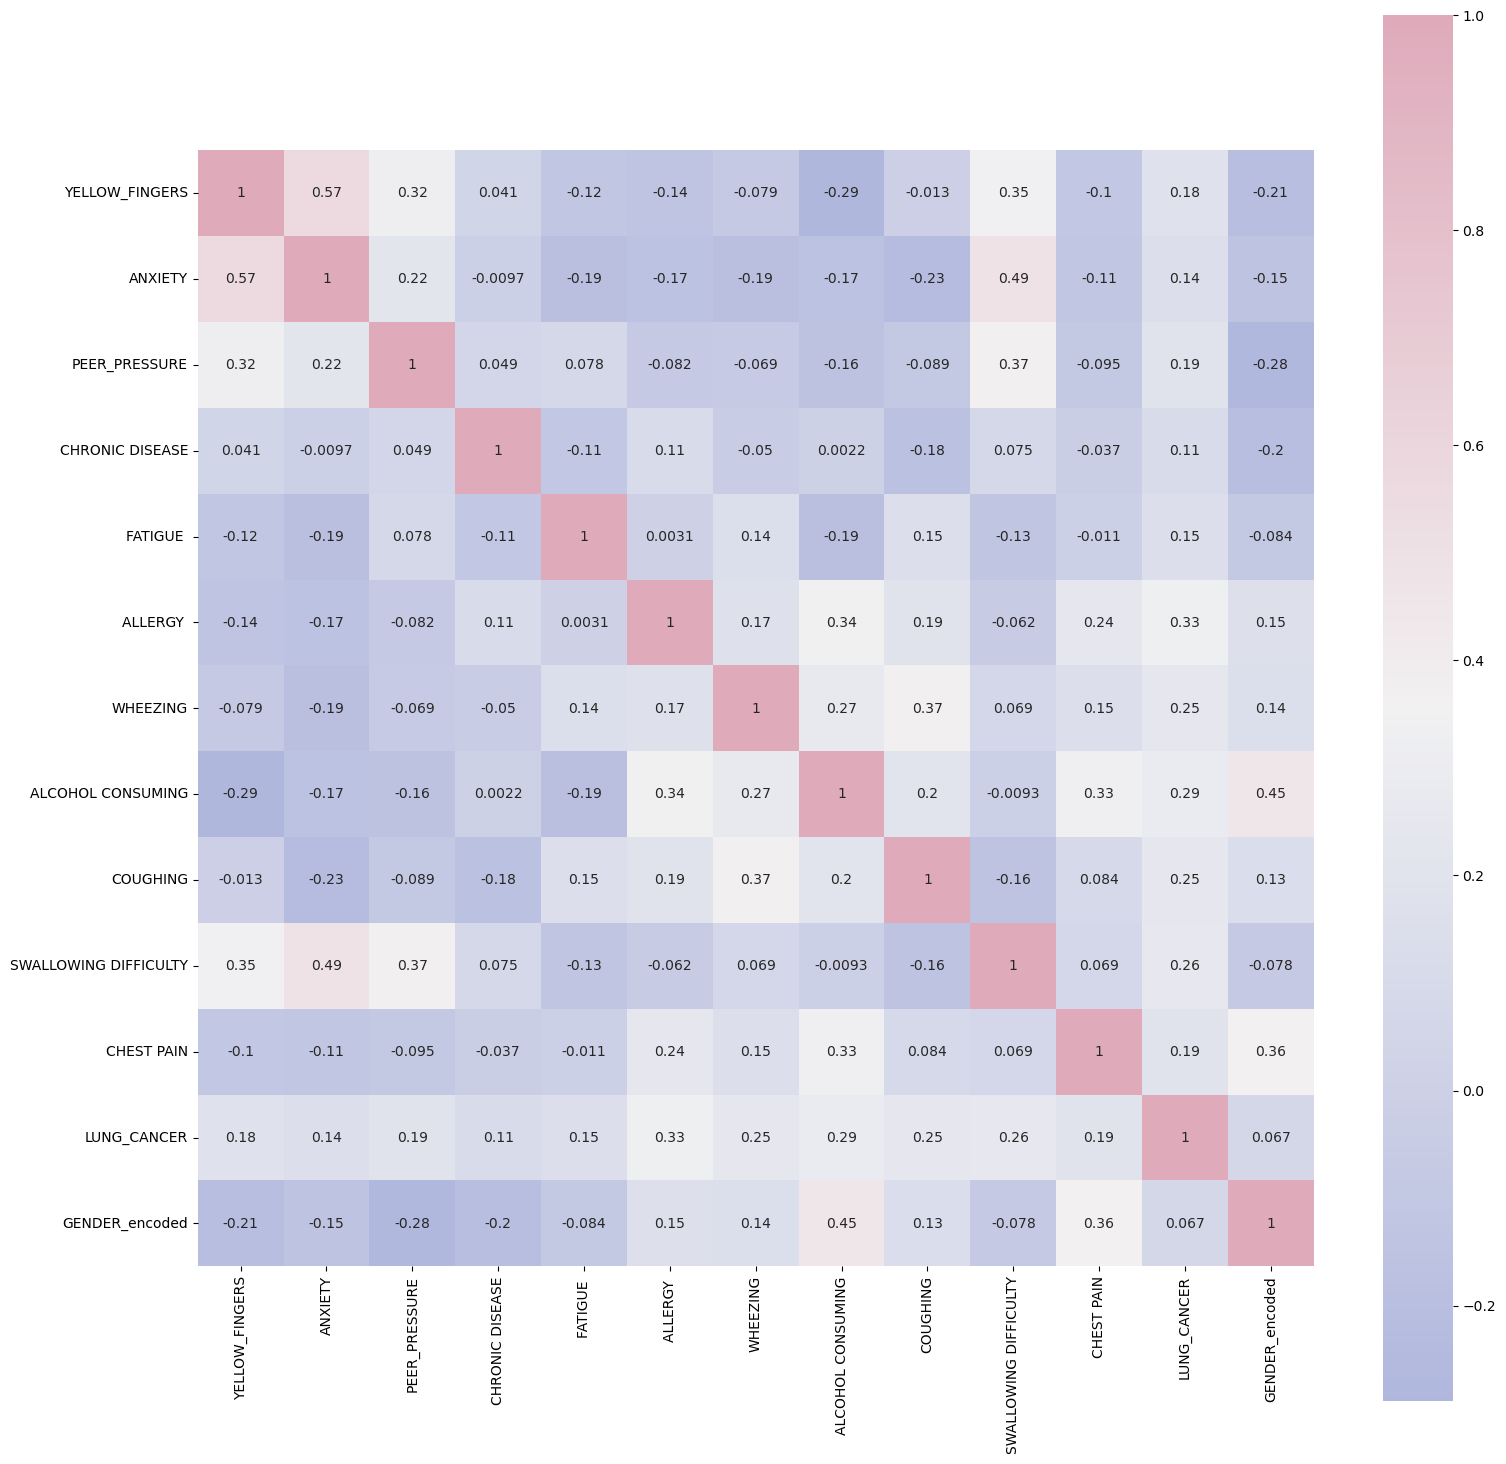

In [354]:
cn=df_new.corr()
cn
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()